# BE6 : Optimisation
### MESSINA Valentin

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from scipy.stats import expon,norm,uniform
from random import *
from math import *

## Partie 1 : recuit-simulé

### Question 1 :

In [58]:
def phi_Mm(X):
    N, D = X.shape
    phi_Mm = np.zeros(N)

    for i in range(N):
        min_distance = float('inf')

        for j in range(N):
            if i != j:
                distance = np.linalg.norm(X[j] - X[i])
                min_distance = min(min_distance, distance)

        phi_Mm[i] = min_distance

    return - min(k for k in (phi_Mm))

# Supposons que plan_X soit le plan d'expérience de taille N en dimension 2

# Exemple1 : Plan carré avec un point au milieu sur [—1,1]^2

side_length = 1
center_point = np.array([0, 0])
corner_points = np.array([[side_length, side_length], [side_length, -side_length],[-side_length, -side_length], [-side_length, side_length]])

plan_X = np.vstack([corner_points, center_point])

# Exemple2 : Plan carré sans point au milieusur [—1,1]^2

#num_points = 4
#side_length = 1
#corner_points = np.array([[side_length, side_length], [side_length, -side_length],
#                          [-side_length, -side_length], [-side_length, side_length]])

#plan_X = corner_points


critere_phiMm = -phi_Mm(plan_X)
print(f"Le critère φMm-optimal pour le plan d'expérience est : {critere_phiMm}")

Le critère φMm-optimal pour le plan d'expérience est : -1.4142135623730951


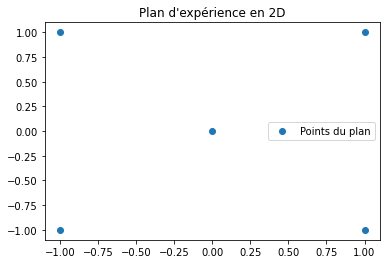

In [59]:
# Visualisation du plan d'expérience
plt.scatter(plan_X[:, 0], plan_X[:, 1], label='Points du plan')
plt.title('Plan d\'expérience en 2D')
plt.legend()
plt.show()

### Question 2 :

points initiaux : [[ 0.27475551  0.7651015 ]
 [-0.65129239  0.34359537]
 [ 0.19031025  0.88470705]
 [ 0.94410564  0.4357764 ]
 [ 0.07880536  0.87470854]]
Iteration 10000: Energy = -1.0734519438052825, Temperature = 1.0857244172444134
Iteration 20000: Energy = -1.1769847839283503, Temperature = 1.0097402012376175
Iteration 30000: Energy = -1.1941525284824064, Temperature = 0.9700275086590244
Iteration 40000: Energy = -1.2247095717895784, Temperature = 0.9436936027173116
Iteration 50000: Energy = -1.2746697782556597, Temperature = 0.9242316480699417
Iteration 60000: Energy = -1.2746697782556597, Temperature = 0.9089160247459882
Iteration 70000: Energy = -1.2746697782556597, Temperature = 0.8963573537663638
Iteration 80000: Energy = -1.2825814320429447, Temperature = 0.885755721820169
Iteration 90000: Energy = -1.2825814320429447, Temperature = 0.876610416365951
Iteration 100000: Energy = -1.2825814320429447, Temperature = 0.868588209364143
Points finaux : [[ 0.84142366  0.94196931]
 [-0.

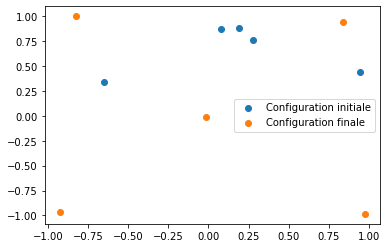

In [61]:
def points_aleatoires_carre():

    # Nombre de points à générer
    nb_points = 5

    # Génération de points aléatoires dans le carré
    points = np.random.uniform(-1, 1, size=(nb_points, 2))
    #plt.scatter(points[:,0], points[:,1])
    return points

def step(ensemble_points):

    # Sélectionne deux indices de points au hasard
    indices_points_choisis = np.random.choice(5, size=2, replace=False)

    # Remplace les points choisis par deux nouveaux points aléatoires dans le carré
    ensemble_modifie = ensemble_points.copy()
    ensemble_modifie[indices_points_choisis[0]] = np.random.uniform(-1, 1, size=2)
    ensemble_modifie[indices_points_choisis[1]] = np.random.uniform(-1, 1, size=2)

    return ensemble_modifie


def step2(matrice_points):

    # Sélectionne un indice de point au hasard
    indice_point_choisi = np.random.randint(0, len(matrice_points))

    # Remplace le point choisi par un nouveau point aléatoire dans le carré
    matrice_modifiee = matrice_points.copy()
    matrice_modifiee[indice_point_choisi] = np.random.uniform(-1, 1, size=2)

    return matrice_modifiee


def simulated_annealing(initial_points):
    print(f"points initiaux : {initial_points}")
    current_points = initial_points.copy()
    current_energy = phi_Mm(current_points)

    iteration = 1
    while True:
        temperature = C / math.log(iteration + 1)
        new_points = step(current_points)
        new_energy = phi_Mm(new_points)

        energy_difference = new_energy - current_energy

        if energy_difference < 0 or random.random() > math.exp(energy_difference / temperature):
            current_points = new_points
            current_energy = new_energy

        # Affichage facultatif pour suivre le progrès
        if iteration % 10000 == 0:
            print(f"Iteration {iteration}: Energy = {current_energy}, Temperature = {temperature}")

        # Condition d'arrêt
        if abs(phi_Mm(new_points)-1.4142135623730951)<eps  or iteration % 100000==0  :
            break

        iteration += 1
    return current_points, current_energy


eps=0.01
initial_points = points_aleatoires_carre()
C=10

final_points, final_energy = simulated_annealing(initial_points)

plt.scatter(initial_points[:,0], initial_points[:,1],label="Configuration initiale")
plt.scatter(final_points[:,0], final_points[:,1],label="Configuration finale")
plt.legend()
print(f"Points finaux : {final_points}")
print(f"Énergie finale : {final_energy}")

- On a choisi une exploration en modifiant 2 points pris au hasard dans le plan et en les remplaçant par des points pris par une loi uniforme dans le carré
- On prend une décroissance de $T$ en logarithme car c'est le choix optimal théoriquement
- On prend une valeur de $C$ supérieure à $\sqrt{2}$ qui est la valeur maximale de $\varphi$

## Partie 2 : régression par moindres carrés régularisés

In [5]:
np.random.seed(seed=31410)
nt = 100 #taille de l'échantillon total 
T = 10 #Dimension de la variable explicative 
d = 200
rsnr=30
Xt=norm.rvs(size=(nt,d))
Xt=Xt/(np.ones((nt,1))*(np.sum(Xt**2,axis=0))**(1/2))   #chaque observation $x_i$ est normalisé de norme 1.

# create signal 
ind=np.random.permutation(d) # crée une permutation de taille d
indice=ind[0:T]  #récupère les T premiers indices de la permutation
weights=norm.rvs(size=(T,1))
for i in range (0,T):
    weights[i]=weights[i] + copysign(1,weights[i])
yt=Xt[0:nt,indice]@weights #le signal ne dépend que des variables dont les indices sont dans indice
stdnoise=np.std(yt)/rsnr
yt=yt+norm.rvs(loc =0, scale = stdnoise,size=(np.size(yt),1))


#création du fichier d'apprentissage
indapp=np.arange(0, floor(nt/2), 1)
nb_app =np.size(indapp) #taille de l'échantillon d'apprentissage
X=Xt[indapp,0:d]
y=yt[indapp]
n=np.size(indapp)

#création du fichier de validation
indval=np.arange(floor(nt/2),nt,1)
Xv=Xt[indval,0:d]
yv=yt[indval]

### Question 1 :

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Fonction de coût avec régularisation l2
def cost_function(X, y, w, lambda_reg):
    m = len(y)
    error = X @ w - y
    cost = (1 / 2) * (np.sum(error ** 2) + lambda_reg/2 * np.sum(w ** 2))
    return cost

# Fonction de gradient avec régularisation l2
def gradient(X, y, w, lambda_reg):
    m = len(y)
    error = X @ w - y
    grad = (1 / 2) * (X.T @ error + lambda_reg/2 * w)
    return grad

# Algorithme de descente de gradient stochastique
def stochastic_gradient_descent(X, y, w_init, lambda_reg, learning_rate, num_iterations):
    w = w_init.copy()
    m = len(y)
    costs = []

    for iteration in range(num_iterations):
        # Choix aléatoire d'un échantillon
        random_index = np.random.randint(m)
        X_i = X[random_index, :].reshape(1, -1)
        y_i = y[random_index]

        # Mise à jour des poids
        grad = gradient(X_i, y_i, w, lambda_reg)
        w = w - learning_rate * grad

        # Enregistrement du coût pour analyse
        cost = cost_function(X, y, w, lambda_reg)
        costs.append(cost)

    return w, costs

# Paramètres
lambda_reg = 10
learning_rate = 0.01
num_iterations = 10000

# Ajout d'un terme constant pour le biais
X_b = np.c_[np.ones((n, 1)), X]

# Initialisation des poids
w_init = np.random.randn(X_b.shape[1], 1)

# Entraînement du modèle
w_optimal, costs = stochastic_gradient_descent(X_b, y, w_init, lambda_reg, learning_rate, num_iterations)

# Ajout d'un terme constant pour le biais sur l'échantillon de validation
Xv_b = np.c_[np.ones((len(yv), 1)), Xv]

# Prédiction sur l'échantillon d'apprentissage
y_pred_train = X_b @ w_optimal

# Prédiction sur l'échantillon de validation
y_pred_val = Xv_b @ w_optimal

# Ajout d'un terme constant pour le biais sur l'échantillon de validation
Xv_b = np.c_[np.ones((len(yv), 1)), Xv]

# Prédiction sur l'échantillon d'apprentissage
y_pred_train = X_b @ w_optimal

# Prédiction sur l'échantillon de validation
y_pred_val = Xv_b @ w_optimal

### Question 2 :

In [46]:
# Calcul du critère sur l'échantillon de validation
error_val = yv - Xv_b @ w_optimal
critere_val = np.linalg.norm(error_val, ord=2)

# Calcul du critère sur l'échantillon d'apprentissage
error_train = y - X_b @ w_optimal
critere_train = np.linalg.norm(error_train, ord=2)

# Comparaison des critères
print("Critère sur l'échantillon d'apprentissage:", critere_train)
print("Critère sur l'échantillon de validation:", critere_val)

Critère sur l'échantillon d'apprentissage: 3.822426497554776
Critère sur l'échantillon de validation: 5.161931967518928


Le critère sur l'échantillon de validation est plus élevé qu'avec l'échantillon d'apprentissage, cela peut indiquer un surajustement du modèle à l'échantillon d'apprentissage.

### Question 3 :

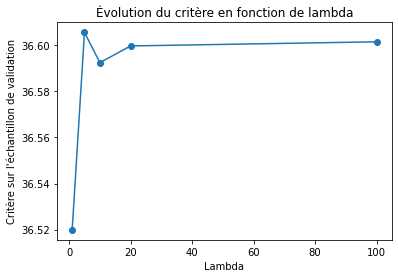

In [44]:
# Liste des valeurs de lambda à tester
lambda_values = [1,5,10,20,100]

# Initialiser une liste pour stocker les critères sur l'échantillon de validation
critere_val_list = []

# Boucle sur les différentes valeurs de lambda
for lambda_val in lambda_values:
    # Initialiser les poids
    w_init = np.zeros(X.shape[1])

    # Résoudre le problème d'optimisation pour la valeur actuelle de lambda
    w_optimal, costs = stochastic_gradient_descent(X, y, w_init, lambda_val, epsilon, num_iterations)
    
    # Calculer le critère sur l'échantillon de validation
    error_val = yv - Xv_b[:, :-1] @ w_optimal
    critere_val = np.linalg.norm(error_val, ord=2)
    
    # Ajouter le critère à la liste
    critere_val_list.append(critere_val)

    # Afficher ou stocker d'autres résultats selon vos besoins
    #print(f"Lambda: {lambda_val}, Critère Validation: {critere_val}")

# Tracer l'évolution du critère en fonction de lambda
plt.plot(lambda_values, critere_val_list, marker='o')
plt.xlabel('Lambda')
plt.ylabel('Critère sur l\'échantillon de validation')
plt.title('Évolution du critère en fonction de lambda')
plt.show()

### Question 4 :